<a href="https://colab.research.google.com/github/Stephen-Njuguna/Moringa_school_week-8_IP/blob/main/Moringa_school_IP_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Nairobi Hospital, clinical camp to test for hypothyroidism**



## Defining the Question 
To determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## Defining Metrics of success
1. Build a model that can accuratly predict whether or not a patient's symptoms indicate that the petient has hypothyroid

## Understanding the Content 
Hypothyroidism is a common condition where the thyroid doesn't create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures

## Recording the Experimental Design
1.   Importing the libraries
2.   Loading and viewing the dataset
3.   Cleaning the data.
4.   Univariate analysis
5.   Bivariate analysis
6.   Multivariate analysis


*   Decision Tree
*   Support Vector Machine





7. Conclusion and Recommendation

## Reading Data

In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Load Dataset 
data = pd.read_csv('hypothyroid.csv')

## Checking Data

In [3]:
# Determining the no. of records in our dataset
#
data.shape

(3163, 26)

In [4]:
# Previewing the Dataset
data.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?


In [5]:
#checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

### Define the appropriateness of the available data
The dataset proovided is appropriate to answer the question because it has all the variables required to create a model that can determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## Data Cleaning 

In [6]:
#check for missing values 
data.isnull().sum().sum()

0

In [7]:
#Check for anomalies 
for i in data.columns:
  print(data[i].unique())
  print('\n')

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

####  anomalies 
We have some anomalies some can be dropped and other have to be replace for us to retain a good size of the dataset

In [8]:
#Step 1
#Dealing with anomalies 
# In sex column replace '?' with NaN to avoid adding another classifier when encoding 
data['sex'].replace('?',np.NaN,inplace=True)

In [9]:
#Drop column TBG, more that half of its dataset has anormalies 
data.drop('TBG',axis=1,inplace=True) 

In [10]:
#Step 2:Dealing with anomalies
#convert categorical to numerical variables 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['status'] = en.fit_transform(data['status'])
data['sex'] = en.fit_transform(data['sex'])
data['on_thyroxine'] = en.fit_transform(data['on_thyroxine'])
data['query_on_thyroxine'] = en.fit_transform(data['query_on_thyroxine'])
data['on_antithyroid_medication'] = en.fit_transform(data['on_antithyroid_medication'])
data['thyroid_surgery'] = en.fit_transform(data['thyroid_surgery'])
data['query_hypothyroid'] = en.fit_transform(data['query_hypothyroid'])
data['query_hyperthyroid'] = en.fit_transform(data['query_hyperthyroid'])
data['pregnant'] = en.fit_transform(data['pregnant'])
data['sick'] = en.fit_transform(data['sick'])
data['tumor'] = en.fit_transform(data['tumor'])
data['lithium'] = en.fit_transform(data['lithium'])
data['goitre'] = en.fit_transform(data['goitre'])
data['TSH_measured'] = en.fit_transform(data['TSH_measured'])
data['T3_measured'] = en.fit_transform(data['T3_measured'])
data['TT4_measured'] = en.fit_transform(data['TT4_measured'])
data['T4U_measured'] = en.fit_transform(data['T4U_measured'])
data['FTI_measured'] = en.fit_transform(data['FTI_measured'])
data['TBG_measured'] = en.fit_transform(data['TBG_measured'])


In [11]:
#Convert data type object  to numeric 
data['age'] = pd.to_numeric(data['age'],errors='coerce')
data['TSH'] = pd.to_numeric(data['TSH'],errors='coerce')
data['T3'] = pd.to_numeric(data['T3'],errors='coerce')
data['TT4'] = pd.to_numeric(data['TT4'],errors='coerce')
data['T4U'] = pd.to_numeric(data['T4U'],errors='coerce')
data['FTI'] = pd.to_numeric(data['FTI'],errors='coerce')

In [12]:
#Step 3: Dealing with anomalies 
# Replace the '?' with the mode 
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

## Exploratory Data Analysis

### Univeriate Analysis

In [13]:
#Data Description 
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,52.260512,0.333228,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,5.046782,0.780272,1.865096,0.921277,107.995858,0.921593,0.978340,0.921910,114.039172,0.082200
std,0.213248,18.089308,0.518103,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,22.160083,0.414128,0.891612,0.269348,43.755469,0.268853,0.217513,0.268356,58.027055,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000
50%,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.000000,1.600000,1.000000,100.000000,1.000000,0.980000,1.000000,105.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.800000,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000
max,1.000000,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000


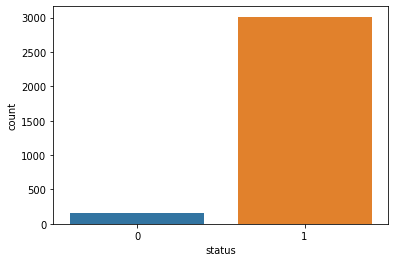

In [14]:
#Plot a histogram showing people with or without hypothyroidism
sns.countplot(data['status'])
plt.show()

Patients diagoised with thyroid are more that those who are not diagoised with thyroid 

### Biavariate Analysis

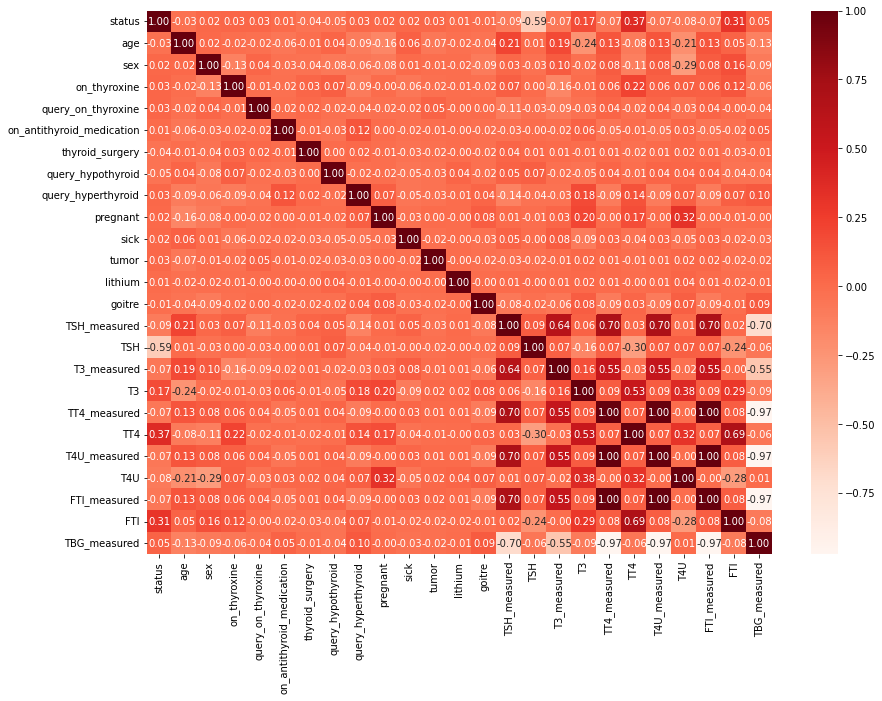

In [15]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()



1.   There is a weak positive relationship between sex and TBG_measured
2.   There a negative weak correlation between age and status
3.   There is a positive weak correlation betweena sex and status



### Multivariate Analysis

### Decision Tree

1.   RandomForestClassifier




In [49]:
#Split to features and target variables 
X = data.drop('status',axis=1)
Y = data['status'].values

In [50]:
#split to train and test sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [51]:
#Import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

#Train Model 
model.fit(X_train,y_train)

#Predict based on the trained model 
y_pred = model.predict(X_test)

#Comparision between the trained model predicton and actual status
c_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

c_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.968388
std,0.198617,0.175058
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [52]:
#Evaluation of model performance 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Absolute Error : 0.01791359325605901
Mean Squared Error : 0.01791359325605901
Root Mean Squared Error : 0.1338416723448232
R2 Score : 0.5454212454212455


The model has an accuracy of 54%

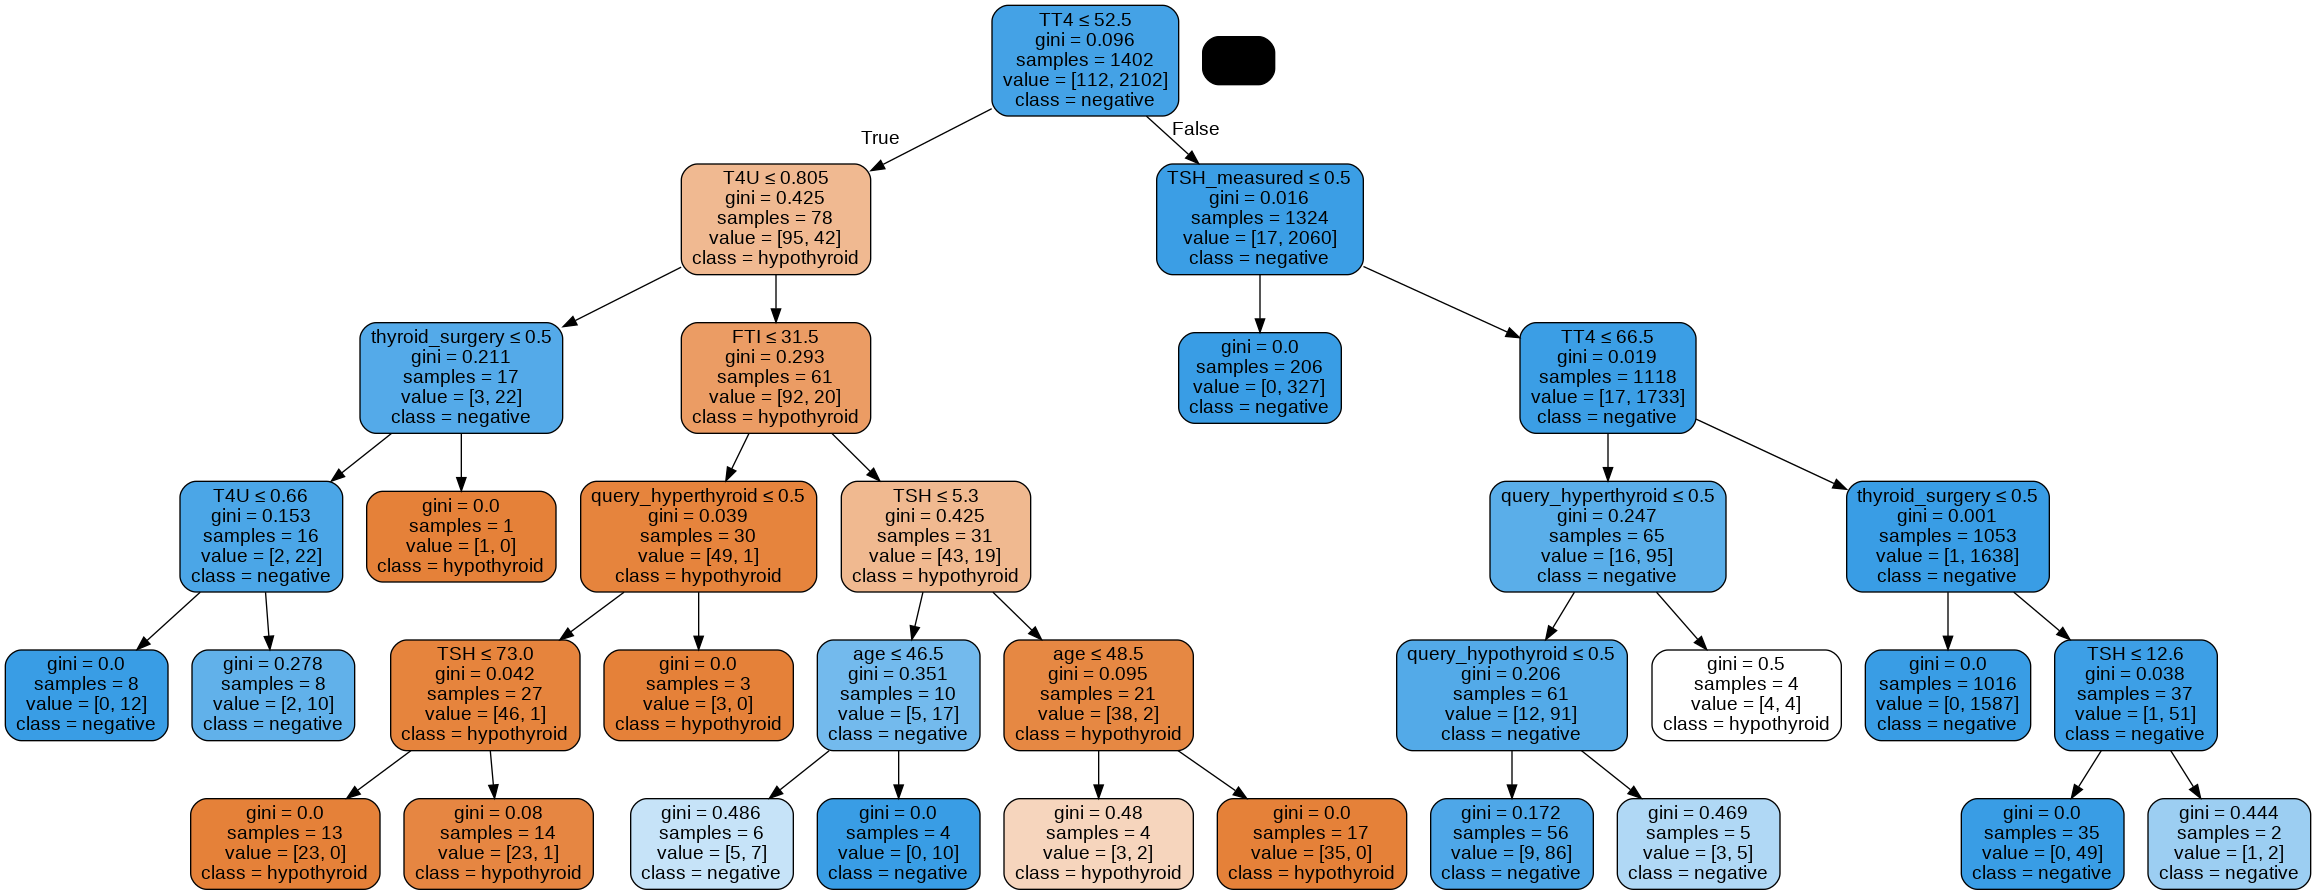

In [53]:
#Visualization of the decision tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
cn =['hypothyroid', 'negative']
tree = model.estimators_[60]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


In [54]:
#Check fot most import variables in making predictions 

importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TT4                  Importance: 0.3
Variable: FTI                  Importance: 0.28
Variable: TSH                  Importance: 0.27
Variable: T3                   Importance: 0.07
Variable: T4U                  Importance: 0.03
Variable: age                  Importance: 0.02
Variable: query_hypothyroid    Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Va

If we are trying to predict the diagonsis status using RandomForestClassifier, we only need 6 variables; TT4,FTI,TSH,T3,T4U,Age


2 . Gridient Boost Classifier


In [55]:
#Import Gridient Boost  model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
g_boost = GradientBoostingClassifier(n_estimators=100, max_depth=5,learning_rate=1.0,random_state=42)

#fit and train model 
g_boost.fit(X_train,y_train)

#predict model with trained model 
y_Pred = g_boost.predict(X_test)

In [56]:
#Model Evaluation and Performance
from sklearn import metrics

print("MAE :",metrics.mean_absolute_error(y_test,y_Pred))
print("MSE :",metrics.mean_squared_error(y_test,y_Pred))
print("RMSES :",np.sqrt(metrics.mean_squared_error(y_test,y_Pred)))
print("Accuracy :",g_boost.score(X_test,y_test))

MAE : 0.01685985247629083
MSE : 0.01685985247629083
RMSES : 0.1298454946322391
Accuracy : 0.9831401475237092


In [57]:
#Check fot most import variables in making predictions (GredientBOosterClassifier)

importances = list(g_boost.feature_importances_)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.66
Variable: TSH                  Importance: 0.27
Variable: on_antithyroid_medication Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: age                  Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: TT4_measured         Importance: 0.0
V

If we are trying to predict hypothyroid status using Gridient boost classifier we only need 4 variables , that is FTI,TSH,on_antithyroid_medication amd TT4

**Decision Tree Conclusion**
Gridient BOost Classifier has an acccuracy of 98%, this model performed better than RandomForestClassfier that has an accuracy of 54%.

### Support Vector Machine

In [58]:
#Import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [59]:
#split feature and target variables
#Use decision tree to pick the most prefered variables when making patient status predictions
X = data[['FTI','TSH','on_antithyroid_medication','TT4','age','sex']].values
Y = data['status'].values


In [60]:
#split to train and test sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [61]:
#Train model when kernel = linear
model_l = SVC(kernel='linear')

#train model 
model_l.fit(X_train,y_train)
#predict 
y_pred = model_l.predict(X_test)

#model evaluation,check for accuracy and model performance 
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9778714436248683
[[ 27  12]
 [  9 901]]


In [62]:
#Train model when kernel = polynomial
model_l = SVC(kernel='poly')

#train model 
model_l.fit(X_train,y_train)
#predict 
y_pred = model_l.predict(X_test)

#model evaluation,check for accuracy and model performance 
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9736564805057956
[[ 26  13]
 [ 12 898]]


In [63]:
#Train model when kernel = rbf
model_l = SVC(kernel='rbf')

#train model 
model_l.fit(X_train,y_train)
#predict 
y_pred = model_l.predict(X_test)

#model evaluation,check for accuracy and model performance 
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9768177028451
[[ 26  13]
 [  9 901]]


In [64]:
#Train model when kernel = sigmoid
model_l = SVC(kernel='sigmoid')

#train model 
model_l.fit(X_train,y_train)
#predict 
y_pred = model_l.predict(X_test)

#model evaluation,check for accuracy and model performance 
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9494204425711275
[[ 13  26]
 [ 22 888]]


#### SVM Hyperparameter tuning

In [65]:
#SVM hyperparameter Tuning using GridSearch and kernel = rbf
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'C': [0.1, -1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
svm_grid = GridSearchCV(model,param_grid=param_grid)

#fit model 
train = svm_grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

In [66]:

# Best parameters after tuning
print(svm_grid.best_params_)
print(svm_grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [67]:
#Fiting best parameters to model 
best_m = SVC(C=10,gamma=0.001,kernel='rbf')
#train model with best parameter
best_m.fit(X_train,y_train)
#predict with model 
y_pred = best_m.predict(X_test)

#model evaluation,check for accuracy and model performance after tuning 
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.982086406743941
[[ 30   9]
 [  8 902]]


After hyperperforming hyperparameter tuning, model accuracy increased to 98%

## Conclusion 
Decision tree model, using random forest classifier the model had a very low performance accuracy compared to the gridient boost classifier. Support vector machine performed equally good as gridient boost classifier after doing hyperparameter tuning , the two model had the same performance accuracyof 98%.

## Recommendation 
After doing analysis and creating a model from the data collected from Thyroid patients , l will recommend for the following  symptoms are to be majorly considered when testing whether or not a patent has thyroid:

1. FTI
2. TSH
3. on_antithyroid_medication
4. TT4